<a href="https://colab.research.google.com/github/RonaldManoelScientist/Analise_de_apartamentos_Airbnb/blob/main/%5BCompleto%5D_Analise_de_Apartamentos_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos tipos de quartos do Airbnb
O Airbnb começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para que possam anunciar seu espaço e reservar acomodações únicas, em qualquer lugar do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.
O Airbnb já é considerado como sendo a ***maior empresa hoteleira da atualidade***. Ah, o detalhe é que ele **não possui nenhum hotel!**

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do [Portal Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

Analisando Airbnb
Neste notebook, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



## Análise dos Dados
Vamos verificar como os dados estão organizados...


In [ ]:
# Vamos fazer a importação da Bibliotecas que usaremos
import pandas as pd # Para a manipução de Dataset
import matplotlib.pyplot as plt # Para a Plotagem de Gráfico
import seaborn as sns # Para Alterar os Estilos dos gráficos

df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv')

df.head(1) # Com esse comando é possivel observar a primeira entrada

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.1794,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN


In [ ]:
df[['minimum_nights','price','availability_365']].describe() # A seguir veremos alguns valores estartísticos

,minimum_nights,price,availability_365
count,24549.000000,24549.000000,24549.000000
mean,5.092142,1029.592285,218.954907
std,21.211509,5403.742297,133.727245
min,1.000000,0.000000,0.000000
25%,2.000000,250.000000,86.000000
50%,3.000000,479.000000,257.000000
75%,4.000000,900.000000,355.000000
max,1000.000000,650476.000000,365.000000


In [ ]:
df.columns # Todas as Variaveis do processo

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
df.isnull().sum() / df.shape[0] # Valores nulos e ausentes do dataset

id                                0.000000
name                              0.000855
host_id                           0.000000
host_name                         0.000611
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.365025
reviews_per_month                 0.365025
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           1.000000
dtype: float64

> É Fácil observar que a variável `license `e `neighbourhood_group` estão com  100% dos seus valores ausentes, já que esses valores se encontram nulos a melhor maneira de lidar com essas váriaveis é deletar

In [ ]:
df.license .head(15)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: license, dtype: float64

In [ ]:
df.neighbourhood_group.head(15)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: neighbourhood_group, dtype: float64

Nesse momento definimos a váriavel **Preço** como `target` ou seja é a nossa váriavel alvo, que mais interessa em nossa pesquisa

> Sendo assim vamos tratar de encontrar valores que estejam fora do padrão 

In [ ]:
df.price[(df['price'] == 0)]

17479    0
17480    0
17520    0
17521    0
17545    0
17563    0
18261    0
Name: price, dtype: int64

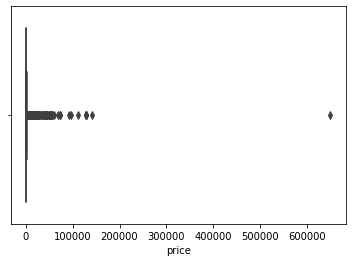

In [ ]:
ax = sns.boxplot(x="price", data=df)

Agora que identificamos a presença de outliers na variável target, vamos analisar a distribuição gera do dataset

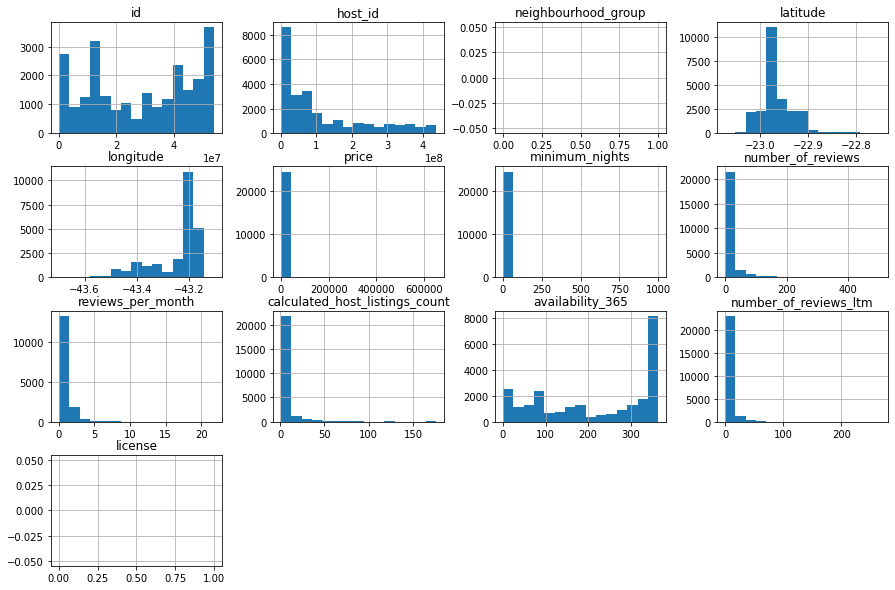

In [ ]:
df.hist(bins=15, figsize=(15,10))
sns.set()

plt.tight_layout;

## Limpeza de Dados
Vamos fazer algumas mudanças....

> Sabendo dos outliers vamos deixar a distribuição dos valores mais proximo da média, onde a maior parte dos eventos ocorre

In [ ]:
df_clean = df.query('price >= 60')
df_clean = df_clean.query('price <= 2000')


df_clean.shape

(22548, 18)

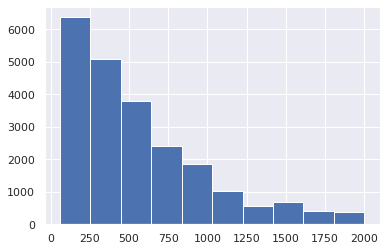

In [ ]:
df_clean['price'].hist();

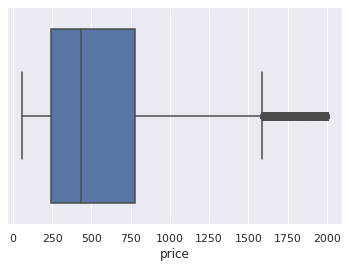

In [ ]:
sns.boxplot(x=df_clean['price']);

In [ ]:
df_clean = df_clean.drop('neighbourhood_group', axis=1)

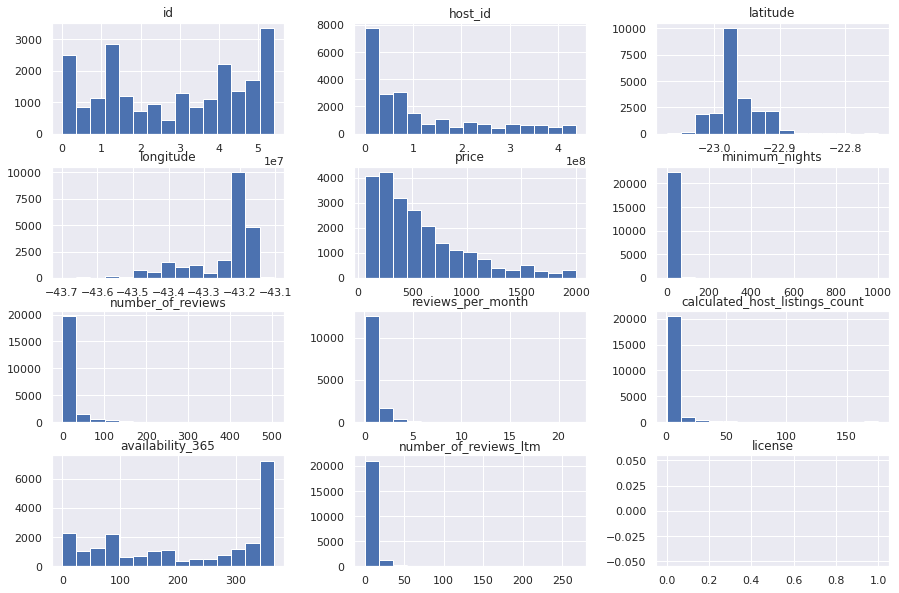

In [ ]:
df_clean.hist(bins=15, figsize=(15,10));

É possivel observar uma boa mudança na visualização dos preços

In [ ]:
df_clean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

## Qual Bairro é o mais Caro?

In [ ]:
# Vamos fazer um agrupamento dos Bairros em relação com a maior média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
São Cristóvão         9411.930556
Joá                   5722.670000
Santa Cruz            3586.157895
São Conrado           2696.937198
Alto da Boa Vista     2391.451613
Anchieta              2069.000000
Itanhangá             1549.975207
Lagoa                 1508.947368
Cachambi              1397.040000
Barra de Guaratiba    1372.776316
Name: price, dtype: float64

Verificamos o seguinte nesses dados apareceram que locais como: Grumari, Caju, vaz Lobo. Apareceram antes de locais como lebron, que nos leva a suspeitar que algo esteja errado, para isso verificamos que utilizamos a média dos valores apresentados e o mesmo pode ser enviezado por uma quantidade bem escassa de amostras.

In [ ]:
#Vamos verificar a quantidade de entradas em cada bairro
df_clean[df_clean['neighbourhood'] == 'Vaz Lobo']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7793,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85527,-43.32623,Entire home/apt,1419,15,0,NaN,NaN,1,365,0,NaN
16810,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86187,-43.32458,Private room,300,1,0,NaN,NaN,1,362,0,NaN


In [ ]:
df_clean[df_clean['neighbourhood'] ==  'Grumari' ].shape[0]

3

In [ ]:
df_clean[df_clean['neighbourhood'] == 'Caju'].shape[0]

1

In [ ]:
df_clean[df_clean['neighbourhood'] == 'Vaz Lobo'].shape[0]

2

In [ ]:
df_clean[df_clean['neighbourhood'] == 'Leblon'].shape[0]

1022

In [ ]:
df_clean = df_clean.drop([df_clean.index[13255], df_clean.index[13831],df_clean.index[14490]])

In [ ]:
df_clean = df_clean.drop([df_clean.index[14483]])

In [ ]:
df_clean = df_clean.drop([df_clean.index[7793], df_clean.index[16810]]) 	

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Caju                      1284.000000
Grumari                   1079.333333
Vaz Lobo                   859.500000
Leblon                     831.112524
Ipanema                    773.565808
Lagoa                      743.174863
Ricardo de Albuquerque     740.000000
Realengo                   707.375000
Vigário Geral              702.500000
São Conrado                693.449367
Name: price, dtype: float64

# Qual Tipo de Imovel é mais alugado?

In [ ]:
df_clean['room_type'].value_counts()

Entire home/apt    16772
Private room        5245
Shared room          463
Hotel room            58
Name: room_type, dtype: int64

In [ ]:
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    648.796029
Hotel room         519.741379
Private room       310.271878
Shared room        218.526998
Name: price, dtype: float64

## Preço por Área

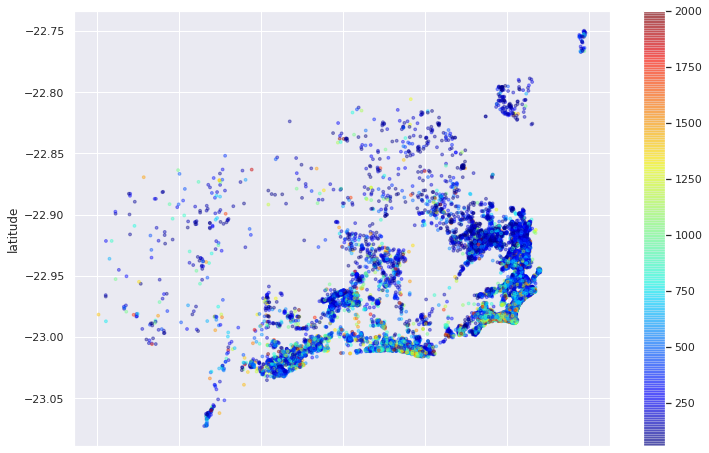

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));
# Onde se encontrar os valores mais caros

Acima temos um mapa onde exibi a localidade dos maiores e menores preços 